#### Load dataset

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist_dataset=fetch_openml("mnist_784", as_frame=False)

In [3]:
mnist_dataset

{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], shape=(70000, 784)),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], shape=(70000,), dtype=object),
 'frame': None,
 'categories': {'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',


#### SGDClassifier

In [4]:
mnist_dataset.data.shape

(70000, 784)

In [5]:
X, y =mnist_dataset.data, mnist_dataset.target

In [6]:
import matplotlib.pyplot as plt

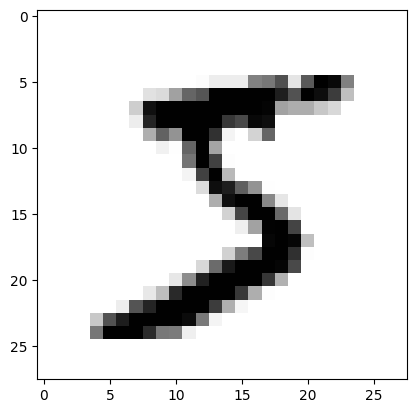

In [7]:
plt.imshow(X[0].reshape(28, 28), cmap="binary")

In [8]:
X_train, X_test, y_train, y_test=X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
from sklearn.linear_model import SGDClassifier

In [10]:
y_train8 = (y_train=="8")
y_test8 = (y_test == "8")

In [11]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train8)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [12]:
sgd.predict(X_train[-3:])

array([False, False,  True])

### Confusion Matrix

In [13]:
sgd.score(X_train, y_train8)

0.9431166666666667

In [14]:
from sklearn.model_selection import cross_val_score

In [15]:
cross_val_score(sgd, X_train, y_train8, cv=5, scoring="accuracy")

array([0.937     , 0.93433333, 0.93533333, 0.93225   , 0.94758333])

In [16]:
from sklearn.dummy import DummyClassifier

In [17]:
dummy_c=DummyClassifier()
dummy_c.fit(X_train, y_train8)

,strategy,'prior'
,random_state,None
,constant,None


In [18]:
dummy_c.predict(X_train).sum()

np.int64(0)

In [19]:
cross_val_score(dummy_c, X_train, y_train8, cv=5, scoring="accuracy")

array([0.9025    , 0.9025    , 0.9025    , 0.9025    , 0.90241667])

In [20]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [21]:
skf= StratifiedKFold(n_splits=5)

In [22]:
for train_i, test_i in skf.split(X_train, y_train8):
    cloned_sgd=clone(sgd)
    X_train_f=X_train[train_i]
    y_train8_f=y_train8[train_i]
    X_test_f=X_train[test_i]
    y_test_f=y_train8[test_i]

    cloned_sgd.fit(X_train_f, y_train8_f)
    y_pred=cloned_sgd.predict(X_test_f)
    correct_prediction=(y_pred==y_test_f).sum()
    print(correct_prediction/len(y_pred))

0.9241666666666667
0.857
0.9331666666666667
0.8948333333333334
0.9374166666666667


In [23]:
from sklearn.model_selection import cross_val_predict

In [24]:
y_pred=cross_val_predict(sgd, X_train, y_train8, cv=5)

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix(y_train8, y_pred)

array([[51103,  3046],
       [ 1865,  3986]])

In [27]:
from sklearn.metrics import precision_score, recall_score,f1_score

In [28]:
precision_score(y_train8, y_pred)

0.5668373151308305

In [29]:
recall_score(y_train8, y_pred)

0.6812510681934713

In [30]:
f1_score(y_train8, y_pred)

0.6187999689513312

### precisin-Recall Trade-off

In [31]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [32]:
sgd.decision_function([X_train[0]])

array([-7151.36524485])

In [ ]:
y_scores=cross_val_predict(sgd, X_train, y_train8, cv=5, method="decision_function")

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
prec, recall, thresholds=precision_recall_curve(y_train8, y_scores)

In [ ]:
import matplotlib.pyplot as plt

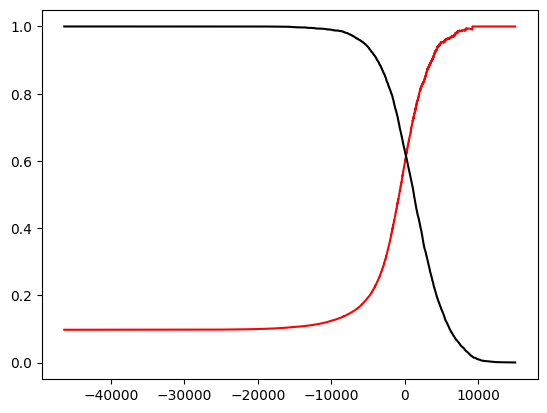

In [ ]:
fig, ax = plt.subplots()
ax.plot(thresholds, prec[:-1], "r", label="Precision")
ax.plot(thresholds, recall[:-1], "black", label="Recall")

Text(0, 0.5, 'precision')

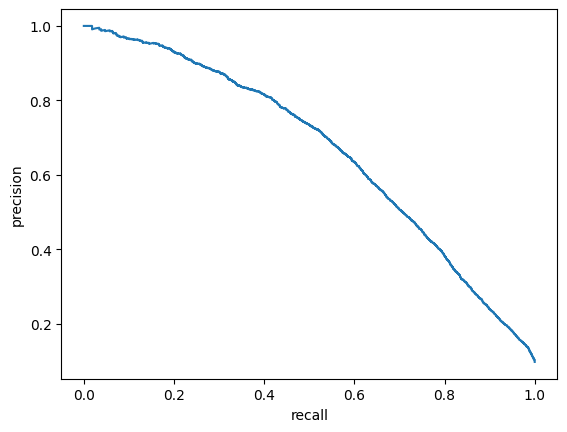

In [ ]:
plt.plot(recall, prec)
plt.xlabel("recall")
plt.ylabel("precision")

In [ ]:
thresh_for_80_prec=thresholds[(prec >= 0.8).argmax()]
thresh_for_80_prec

np.float64(1938.9752296406114)

In [ ]:
y_pred_80_prec=(y_scores >= thresh_for_80_prec)

In [ ]:
y_pred_80_prec

array([False, False, False, ..., False, False,  True], shape=(60000,))

In [ ]:
precision_score(y_train8, y_pred_80_prec)

0.8

In [ ]:
recall_score(y_train8, y_pred_80_prec)

0.4218082379080499

### ROC curve

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fpr, tpr, thresholds=roc_curve(y_train8, y_scores)

Text(0, 0.5, 'TPR')

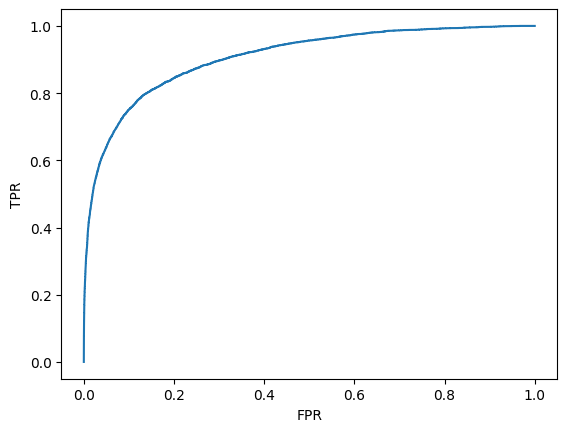

In [ ]:
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_train8, y_scores)

0.9068992957861995